# Example data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv("data/Algerian_forest_fires_dataset.csv")

In [6]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      245 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [8]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        2
dtype: int64

In [9]:
df.shape

(247, 14)

In [10]:
# Kết hợp 2 vùng trong bộ dataset
df.loc[:122, "Region"] = int(0)
df.loc[122:, "Region"] = int(1)
df.Region = df.Region.astype(int)

In [11]:
## drop NAN
df.drop(index=[122, 123, 124], inplace=True, axis=1)
df = df.reset_index(drop=True)

In [12]:
df.shape

(244, 15)

In [13]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
# Chỉnh lại kiểu dữ liệu
df[df.columns[:6]] = df[df.columns[:6]].astype(int)
df[df.columns[6:13]] = df[df.columns[6:13]].astype(float) 

In [15]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               5
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [16]:
df.Classes = df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [17]:
df.Classes = np.where(df.Classes == 'fire', 1, 0)

#### EDA

In [18]:
df_copy = df.copy()
df_copy.drop(['year', 'month', 'day'], axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.7 KB


In [20]:
df_copy.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.565574,0.500000
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.496700,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,1.000000,0.500000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [21]:
# Kiểm tra số lượng mỗi class
df_copy['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

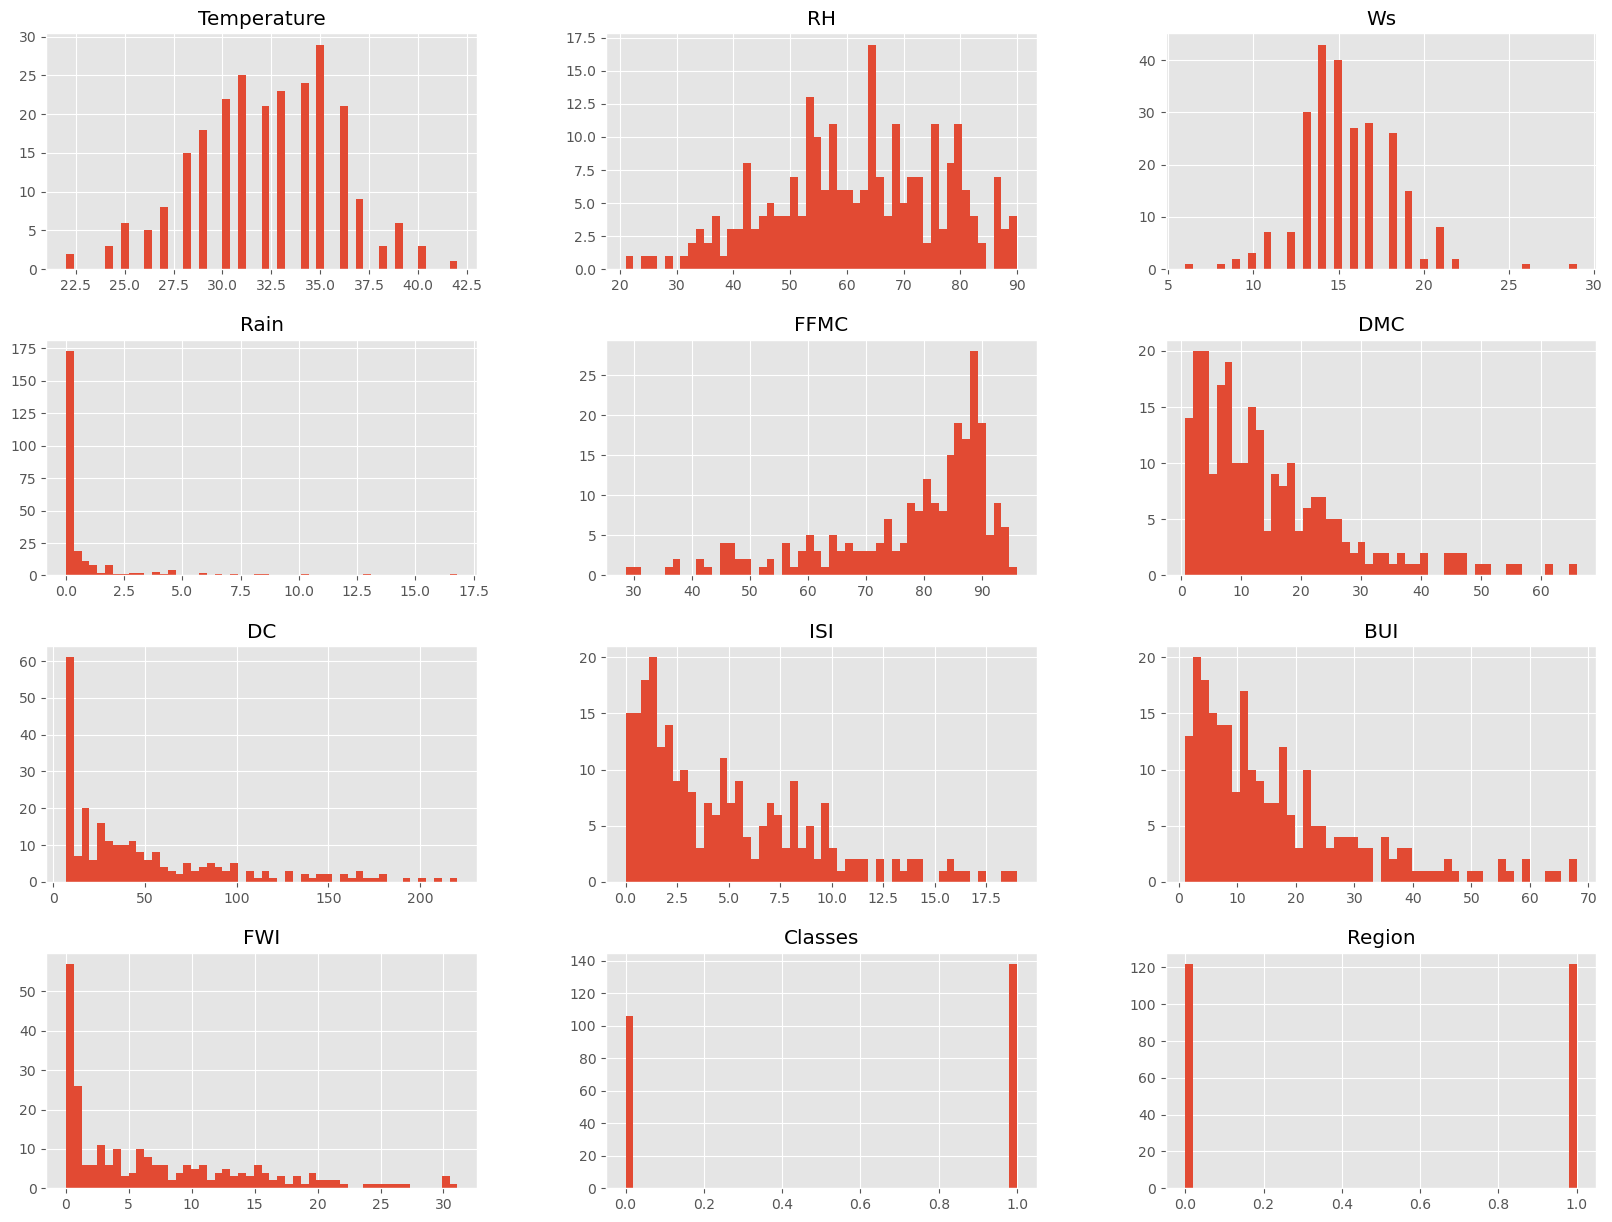

In [22]:
# Vẽ biểu đồ phân bố dữ liệu cho tất cả các trường dữ liệu
plt.style.use('ggplot')
df_copy.hist(bins=50, figsize=(20, 15))

['Fire', 'Not Fire']


Text(0.5, 1.0, 'Pie chart for Classes')

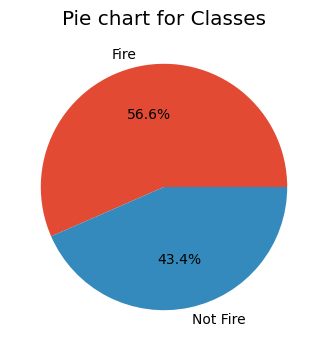

In [23]:
# Vẽ biểu đồ tròn cho Classes
percentage = df_copy.Classes.value_counts(normalize=True) * 100
classlabels = ['Fire', 'Not Fire']
plt.figure(figsize=(6, 4))
print(classlabels)
plt.pie(percentage, labels=classlabels, autopct="%1.1f%%")
plt.title('Pie chart for Classes')

<Axes: >

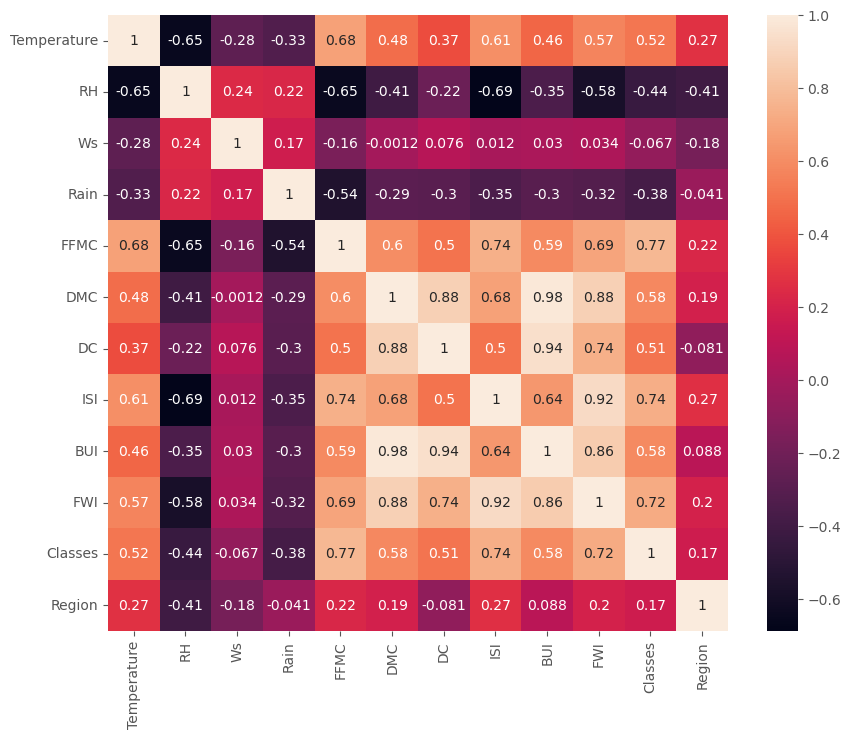

In [24]:
# correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy.corr(), annot=True)

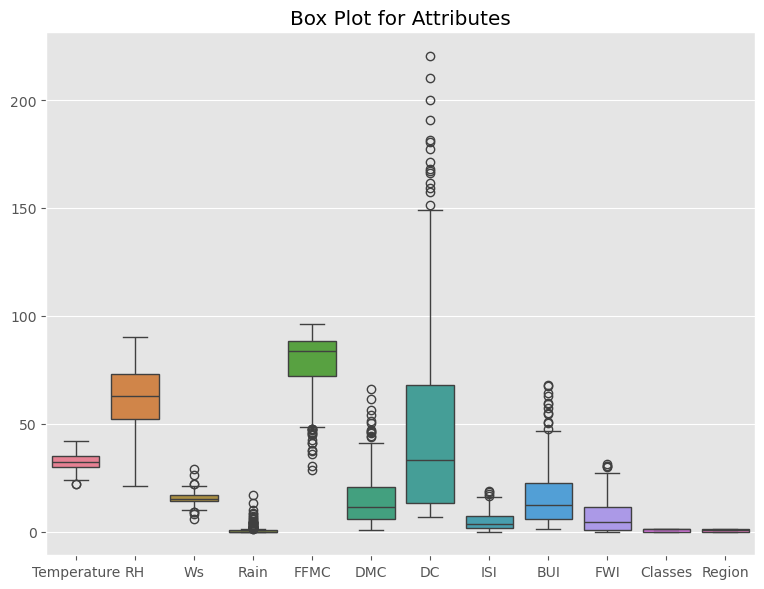

In [ ]:
# boxplot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_copy)
plt.title("Box Plot for Attributes")
plt.tight_layout()

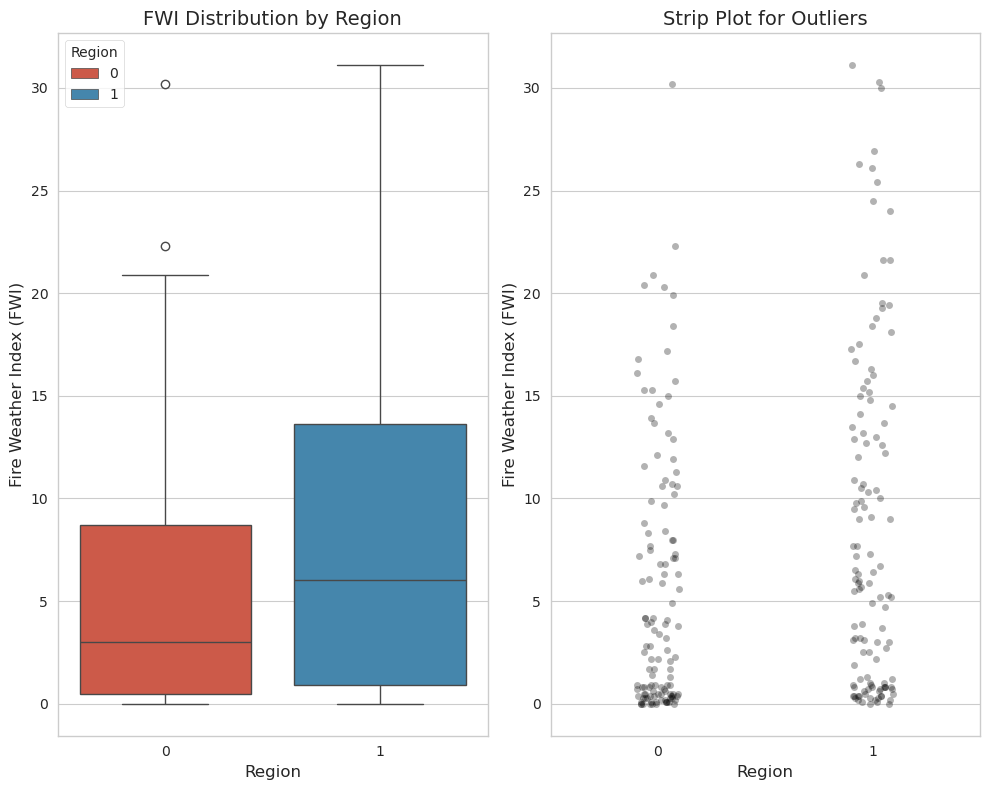

In [26]:
# boxplots để tìm ngoại lai trong vùng
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
plt.subplot(1, 2, 1)
sns.boxplot(x='Region', y='FWI', hue='Region', data=df_copy)
plt.title('FWI Distribution by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Fire Weather Index (FWI)')
plt.subplot(1, 2, 2)
sns.stripplot(x='Region', y='FWI', data=df_copy, color='black', alpha=0.3, jitter=True)
plt.title('Strip Plot for Outliers', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Fire Weather Index (FWI)')
plt.tight_layout()

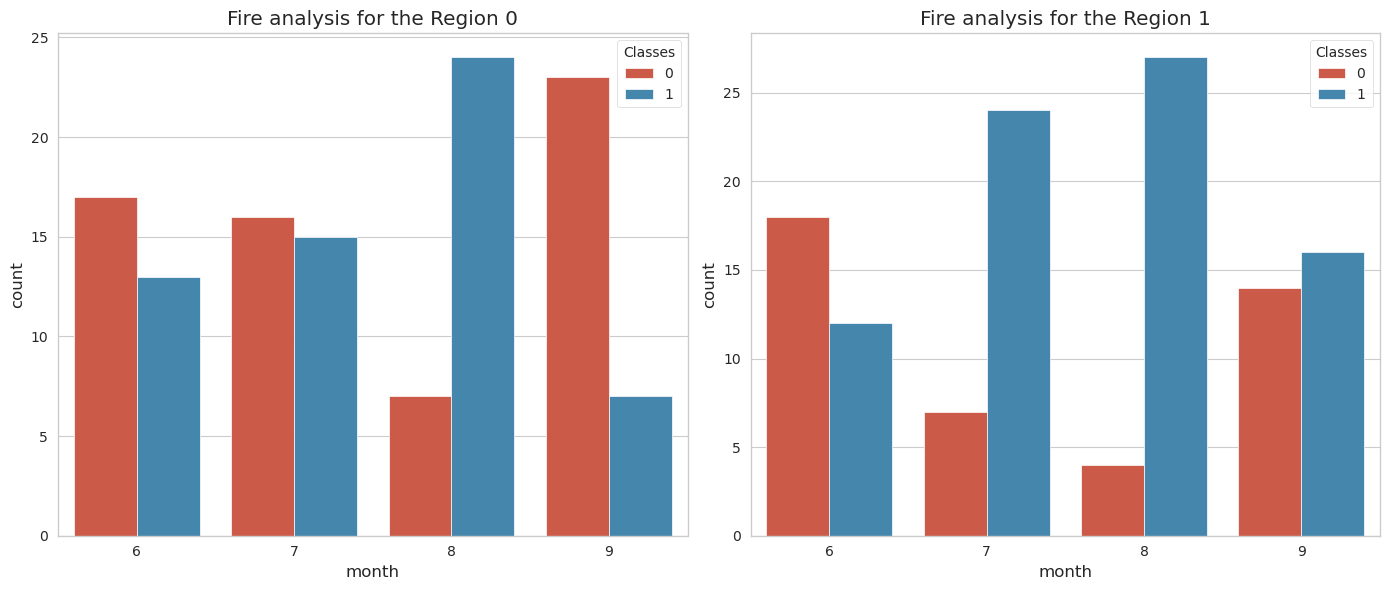

In [27]:
# số lượng cháy hàng tháng trong từng khu vực
plt.figure(figsize=(14, 6)) 
plt.subplot(1, 2, 1)
dftemp = df[df.Region == 0]
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.title('Fire analysis for the Region 0')
plt.subplot(1, 2, 2)
dftemp = df[df.Region == 1]
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.title('Fire analysis for the Region 1')
plt.tight_layout()

- Các vụ cháy thường diễn ra vào tháng 8 trong năm ở cả hai vùng

<Axes: xlabel='day', ylabel='Temperature'>

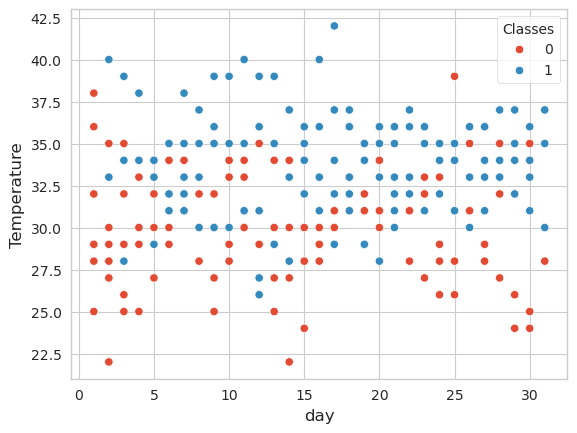

In [28]:
# scatter plot cho nhiệt độ và ngày
sns.scatterplot(y='Temperature', x='day', data=df, hue='Classes')

<Figure size 800x600 with 0 Axes>

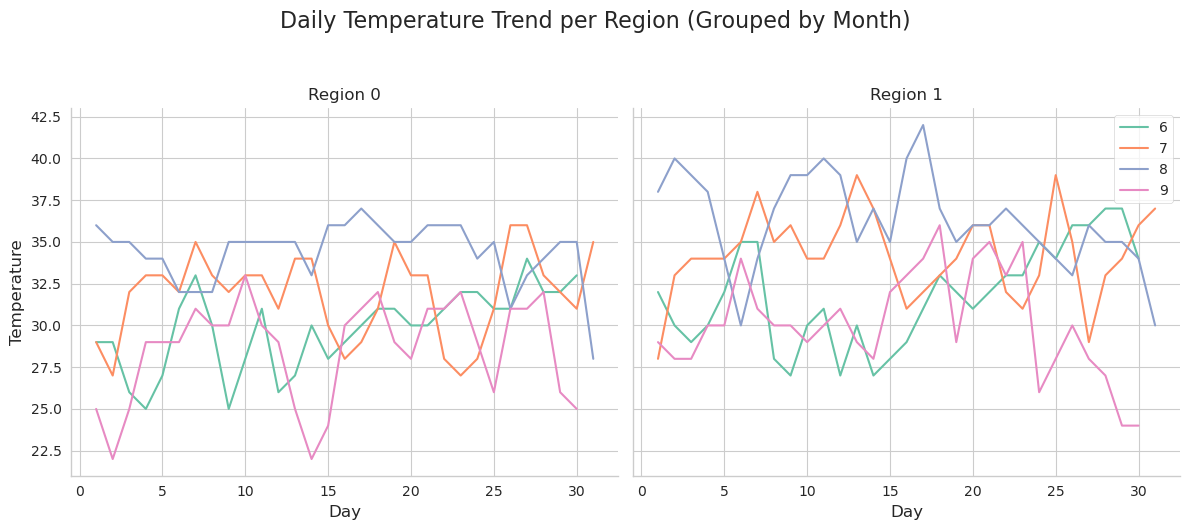

In [29]:
# biểu đồ nhiệt độ cho từng ngày trong tháng
plt.figure(figsize=(8, 6))
df_temp = df[['day', 'month', 'Region', 'Temperature']]

g = sns.FacetGrid(df_temp, col="Region", height=5, aspect=1.2)
g.map_dataframe(sns.lineplot, x="day", y="Temperature", hue="month", palette='Set2')

g.set_axis_labels("Day", "Temperature")
g.set_titles("Region {col_name}")
plt.suptitle("Daily Temperature Trend per Region (Grouped by Month)", fontsize=16, y=1.05)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

# Merge data from NASA FIRMS and ERA5